# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends

1.	Conditions such as percent humidity and cloudiness are lowest in the north and south poles; very few plots appeared in these regions. 
2.	Highest temperatures appear nearest the equator (0 latitude). This was assumption on my part, understanding that more sunlight hits the equator, until I see it plotted in this activity. 
3.	Temperatures in the northern hemisphere are much easier to predict (coefficient of determination; r-squared value) compared to the southern hemisphere. 
4.	Please note that each time this Jupyter notebook is run from the start, the list of cities (name and quantity) changes. This observation is not indicative of the weather trends identified by this activity. 


In [ ]:
pip install citipy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# OpenWeatherMap API Key
api_key = weather_api_key

In [ ]:
# endpoint:  Url From openweather for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"        

In [ ]:
# create lists for append
city_name = []
country = []
date = []
temp = []
humidity = []
cloudiness = []
wind = []
lat = []
long = []

In [ ]:
# begin loop through cities = API calls for each  
count = 1
for city in cities:
    city=city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    
    response = requests.get(query_url).json()  
    
    # extract data from API
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"City record {count} : {city}")
        count += 1
    except (KeyError):
        print("City not found.")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Longitude": long,
                "Max Temp": temp,
                "Wind Speed": wind}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('Output_data/WeatherPy_data.csv')

In [12]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Bengkulu,63,ID,1612535046,83,-3.8004,102.2655,78.80,4.14
1,Ushuaia,40,AR,1612534885,76,-54.8000,-68.3000,50.00,31.07
2,Rikitea,78,PF,1612535183,74,-23.1203,-134.9692,77.77,14.12
3,Atuona,25,PF,1612535184,80,-9.8000,-139.0333,78.51,14.43
4,Saskylakh,100,RU,1612535184,83,71.9167,114.0833,-31.61,5.57


In [14]:
# Export the City_Data into a csv
weather_data.to_csv("output_data/WeatherPy_data.csv")
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Bengkulu,63,ID,1612535046,83,-3.8004,102.2655,78.80,4.14
1,Ushuaia,40,AR,1612534885,76,-54.8000,-68.3000,50.00,31.07
2,Rikitea,78,PF,1612535183,74,-23.1203,-134.9692,77.77,14.12
3,Atuona,25,PF,1612535184,80,-9.8000,-139.0333,78.51,14.43
4,Saskylakh,100,RU,1612535184,83,71.9167,114.0833,-31.61,5.57
...,...,...,...,...,...,...,...,...,...
550,Ambatofinandrahana,97,MG,1612535268,78,-20.5500,46.8000,72.73,5.12
551,Chicama,75,PE,1612535268,88,-7.8447,-79.1469,69.80,8.05
552,Pucallpa,40,PE,1612535268,78,-8.3791,-74.5539,80.60,1.14
553,Aksha,42,RU,1612535268,87,50.2814,113.2867,4.08,6.31


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.   #.loc
humidity_check = weather_data.loc[weather_data['Humidity']>100]
humidity_check

# There are no cities with humidity GREATER THAN 100%.

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

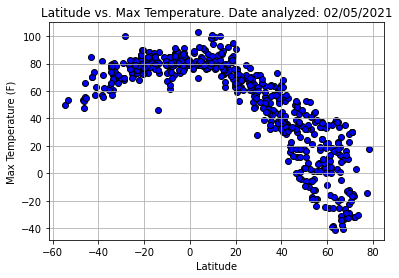

In [16]:
#Creating 1st plot ( Latitude vs Max temp)
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs. Max Temperature. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_temp")
plt.show()

About Lat vs Temp plot:  The closer to the equator, the warer the temperatures. 
As temps move away from 0 latitude on the x axis, the temperatures begin to drop.

## Latitude vs. Humidity Plot

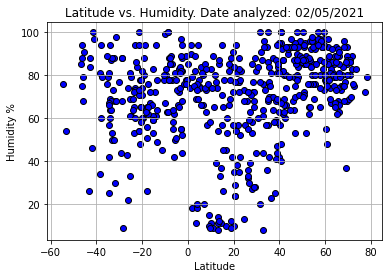

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"Latitude vs. Humidity. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_humidity")
plt.show()

About Lat vs. Humidity plot:  There is no real correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

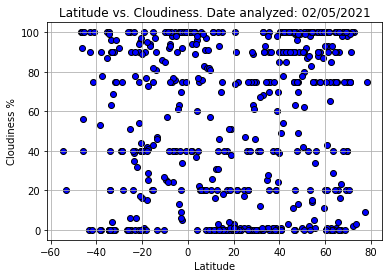

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"Latitude vs. Cloudiness. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_cloudiness")
plt.show()

About Lat vs Cloudiness plot: There is evidence of cloudiness clustering horizonally along the latitude lines. More weather analysis should be done to explain why. 

## Latitude vs. Wind Speed Plot

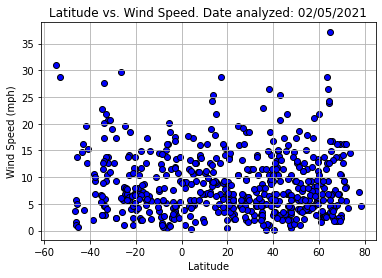

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
today = time.strftime("%m/%d/%Y")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed. Date analyzed: {today}")
plt.savefig("Images/scatter_lat_wind")
plt.show()

About Lat vs Wind plot:  There is a strong correlation between wind speed near the equator. It is highest at this point, demonstrated by the clusters of blue dots. Wind speeds slow down further north.

## Linear Regression

In [20]:
# Run linear regression on each relationship. Separate plots into Northern Hemisphere (greater >= to 0 degrees latitude)
# Southern Hemisphere (< 0 degrees latitude)

northern = weather_data.loc[weather_data['Lat']>=0]
southern = weather_data.loc[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.767267554250749


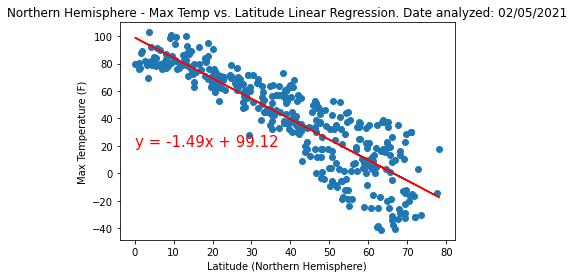

In [21]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression. Date analyzed: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_temp_lat")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35516863996011616


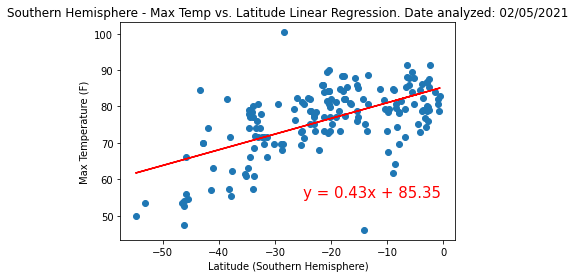

In [22]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression. Date analyzed: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_temp_lat")
plt.show()

Analysis of Max Temp vs Latitude linear regression:  The r squared number for the northern hemisphere is higher than 
the southern hemishpere, and therefore more acurate. More data points fall closer to the regression line in the 
northern hemisphere, indicating that the temperatures in the northern hemisphere are more predictable than in the 
southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17713476715315105


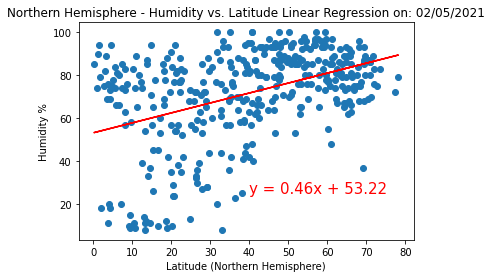

In [23]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("scatter_lat_humidity")
plt.savefig("Images/north_linear_humid_lat")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00458127355101389


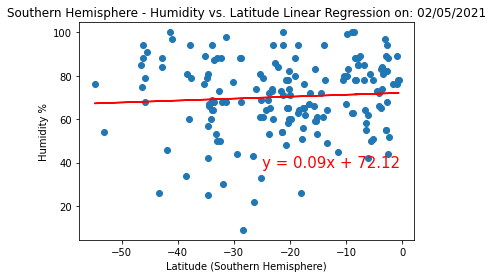

In [24]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,38),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_humid_lat")
plt.show()

Analysis of Humidity vs Latitude linear regression: Humidity is unpredictable in both hemispheres; 
both have approximately 20% predictablity given their low r-square numbers. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0646431106788805


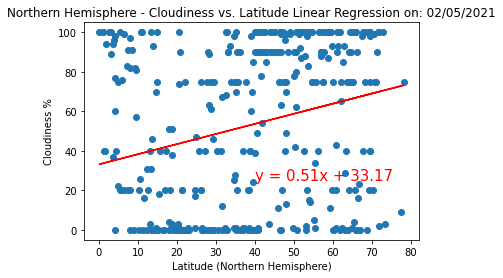

In [25]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_cloud_lat")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016382344901499073


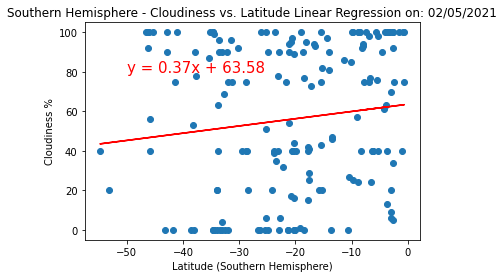

In [26]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_cloud_lat")
plt.show()

Analysis of Cloudiness vs Latitude linear regression: Similar to the humidity predictors in both northern and 
southern hemispheres, cloudiness is even less predictable given the low r-squared numbers and scattered dots 
not aligning with regression line.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00014157085115087755


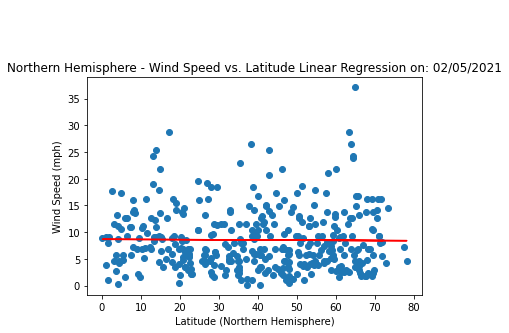

In [27]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Northern Hemisphere)')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/north_linear_wind_lat")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.055934340040339904


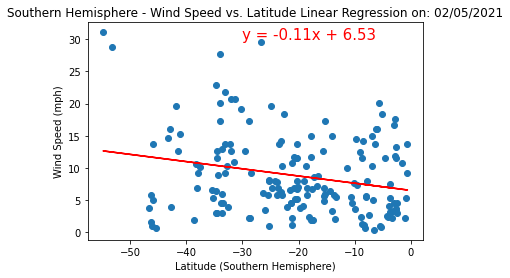

In [28]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression on: {today}")
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/south_linear_wind_lat")
plt.show()

Analysis of Wind Speed vs Latitude linear regression: Although the r-squared numbers for the wind speed in both 
northern and southern hemispheres is very low, the plotted speeds fall somewhat along the regression line. 
Low r-squared values are not always bad. In both hemispheres, latitude is the constant variable that 
indicates wind speeds are lower, nearest to the equator, for both hemispheres. 